In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('diamonds')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

In [5]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [6]:
cols = ['color', 'clarity']
df1 = df.copy()
df1[cols] = df[cols].apply(lambda x: x.cat.codes)
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,6,6,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df1 = df1.sample(5000, random_state=123)

In [8]:
y = df1.cut
del df1['cut']
X = df1

In [9]:
!pip install yellowbrick

In [10]:
from yellowbrick.features import Rank1D, Rank2D

array([[0.31, 3.  , 3.  , ..., 4.32, 4.28, 2.71],
       [0.46, 1.  , 6.  , ..., 4.98, 5.  , 3.06],
       [1.21, 4.  , 5.  , ..., 6.83, 6.79, 4.25],
       ...,
       [0.36, 0.  , 2.  , ..., 4.57, 4.63, 2.85],
       [1.03, 6.  , 3.  , ..., 6.43, 6.49, 3.88],
       [1.52, 2.  , 6.  , ..., 7.33, 7.37, 4.58]])

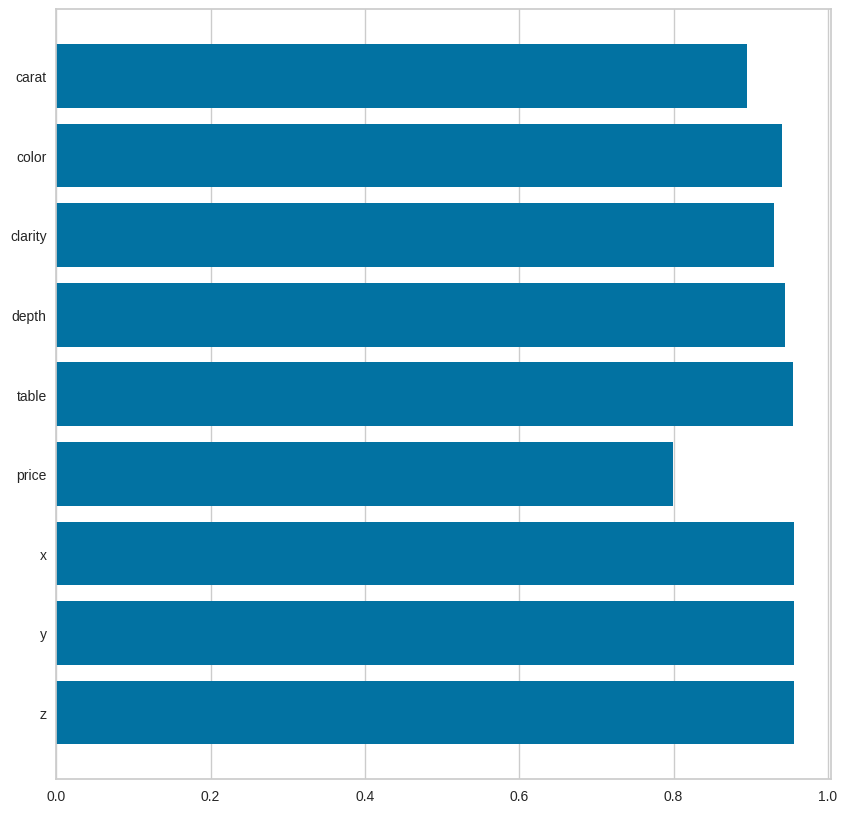

In [11]:
visualizer = Rank1D(algorithm='shapiro')
plt.figure(figsize=(10, 10))
visualizer.fit(X, y)
visualizer.transform(X.values)

array([[0.31, 3.  , 3.  , ..., 4.32, 4.28, 2.71],
       [0.46, 1.  , 6.  , ..., 4.98, 5.  , 3.06],
       [1.21, 4.  , 5.  , ..., 6.83, 6.79, 4.25],
       ...,
       [0.36, 0.  , 2.  , ..., 4.57, 4.63, 2.85],
       [1.03, 6.  , 3.  , ..., 6.43, 6.49, 3.88],
       [1.52, 2.  , 6.  , ..., 7.33, 7.37, 4.58]])

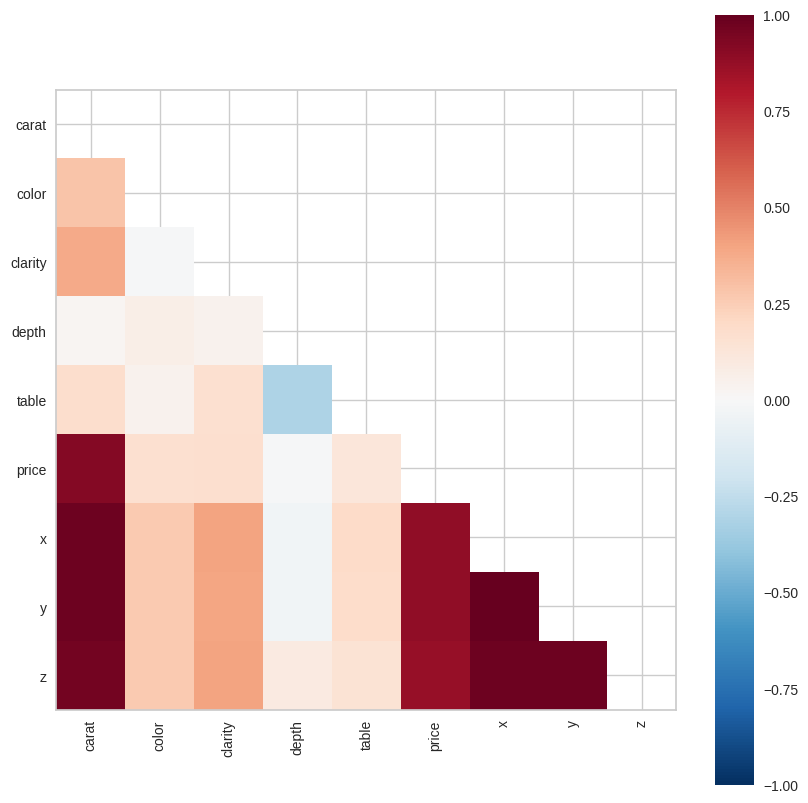

In [12]:
visualizer = Rank2D(algorithm='pearson')
plt.figure(figsize=(10, 10))
visualizer.fit(X, y)
visualizer.transform(X.values)


In [17]:
cols = ['color', 'clarity', 'cut']
df2 = df.copy()
df2[cols] = df[cols].apply(lambda x: x.cat.codes)
#df2 = df2.sample(5000, random_state=123)



In [18]:
y1 = df2.cut
del df2['cut']
X1 = df2

In [19]:
from yellowbrick.features import RadViz

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,6,6,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,0,5,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,0,5,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,0,5,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,6,61.0,58.0,2757,6.15,6.12,3.74


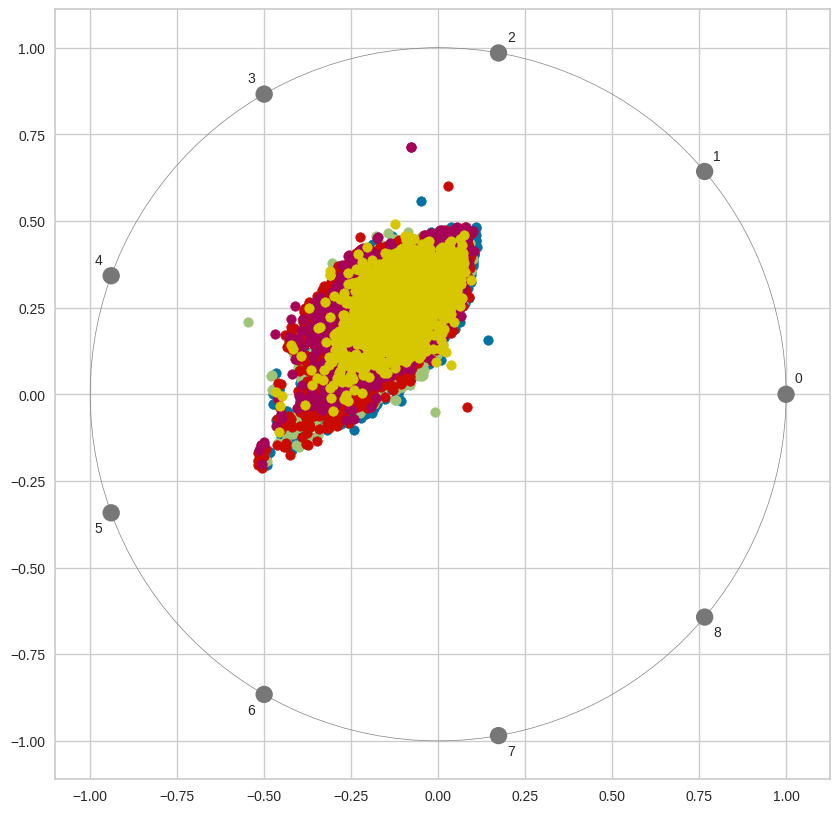

In [20]:
plt.figure(figsize=(10,10))
visualizer = RadViz()
visualizer.fit(X1.values, y1)
visualizer.transform(X1)

In [ ]:
del df2['x']
del df2['y']
del df2['z']
X1 = df2

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,6,6,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,0,5,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,0,5,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,0,5,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,6,61.0,58.0,2757,6.15,6.12,3.74


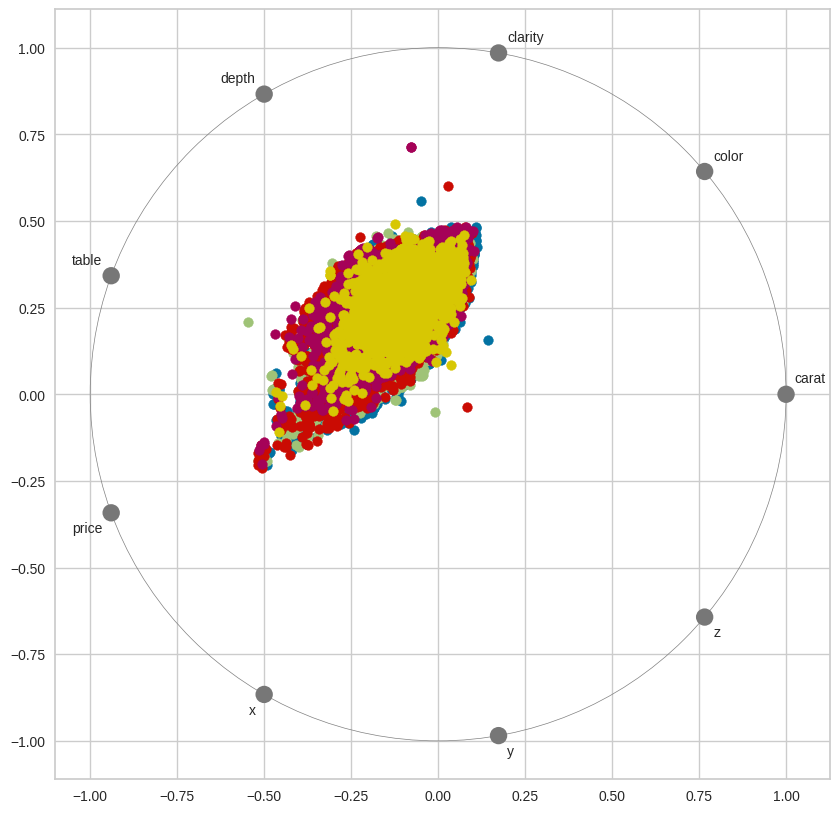

In [21]:
plt.figure(figsize=(10,10))
visualizer = RadViz()
visualizer.fit(X1, y1)
visualizer.transform(X1)

In [27]:
from yellowbrick.features import JointPlotVisualizer

In [28]:
x2 = df1['color']
y2 = df1['depth']

JointPlot(ax=<Axes: xlabel='x', ylabel='y'>)

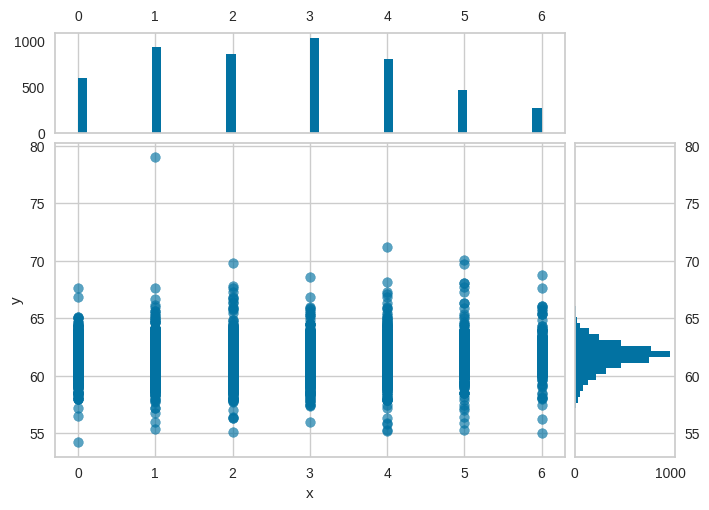

In [30]:
visualizer = JointPlotVisualizer(column=['color'])
visualizer.fit(x2, y2)

In [31]:
x3 = df1['x']
y3 = df1['y']

JointPlot(ax=<Axes: xlabel='x', ylabel='y'>)

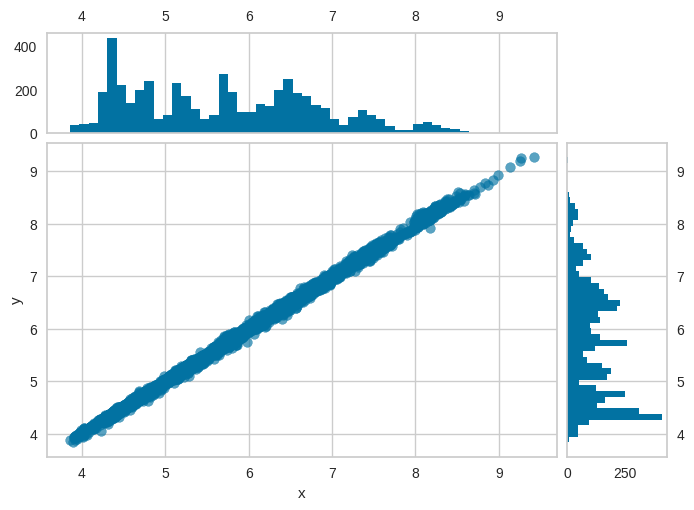

In [33]:
visualizer = JointPlotVisualizer()
visualizer.fit(x3, y3)

In [34]:
from yellowbrick.target import FeatureCorrelation

ValueError: ignored

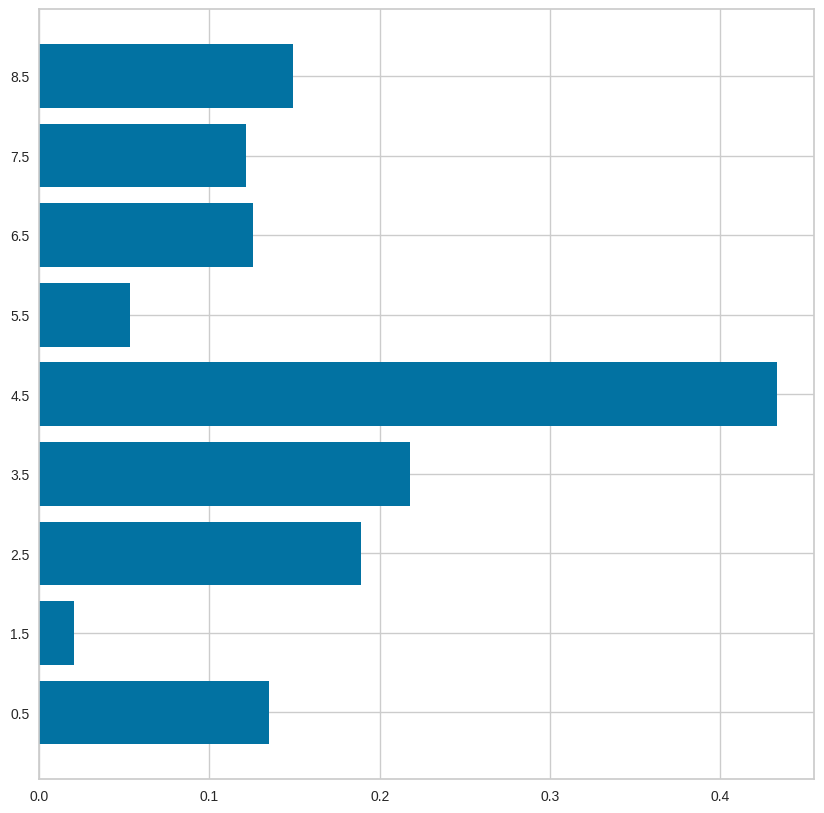

In [37]:
plt.figure(figsize = (10, 10))
cols = np.array(['depth', 'price', 'clarity', 'color', 'table', 'carat'])
visualizer = FeatureCorrelation(labels=cols)
visualizer.fit(X1, y1)

In [38]:
df3 = df.loc[df['cut'].isin(['Ideal', 'Premium', 'Very Good'])].reset_index(drop=True)

In [39]:
cols = ['color', 'clarity']
df3[cols] = df3[cols].apply(lambda x: x.cat.codes)
y4 = df3.cut
del df3['cut']
del df3['x']
del df3['y']
del df3['z']
x4 = df3

In [40]:
from yellowbrick.features import ParallelCoordinates

,carat,color,clarity,depth,table,price
0,0.23,1,6,61.5,55.0,326
1,0.21,1,5,59.8,61.0,326
2,0.29,5,4,62.4,58.0,334
3,0.24,6,2,62.8,57.0,336
4,0.24,5,1,62.3,57.0,336
...,...,...,...,...,...,...
47419,0.72,0,5,62.7,59.0,2757
47420,0.72,0,5,60.8,57.0,2757
47421,0.70,0,5,62.8,60.0,2757
47422,0.86,4,6,61.0,58.0,2757


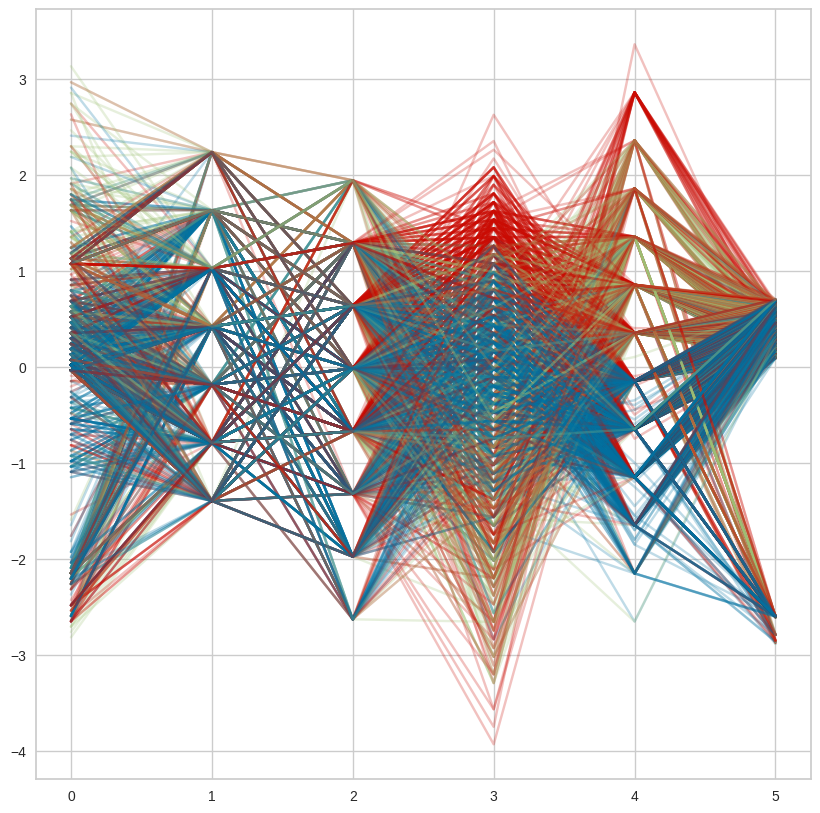

In [41]:
cols = ['depth', 'price', 'clarity', 'color', 'table', 'carat']
classes = ['Ideal', 'Premium', 'Very Good']

plt.figure(figsize=(10,10))
visualizer = ParallelCoordinates(classes=classes, features=cols, sample=0.05, normalize='standard')
visualizer.fit_transform(x4, y4)

In [42]:
from yellowbrick.features import pca_decomposition

In [44]:
from yellowbrick.target import balanced_binning_reference

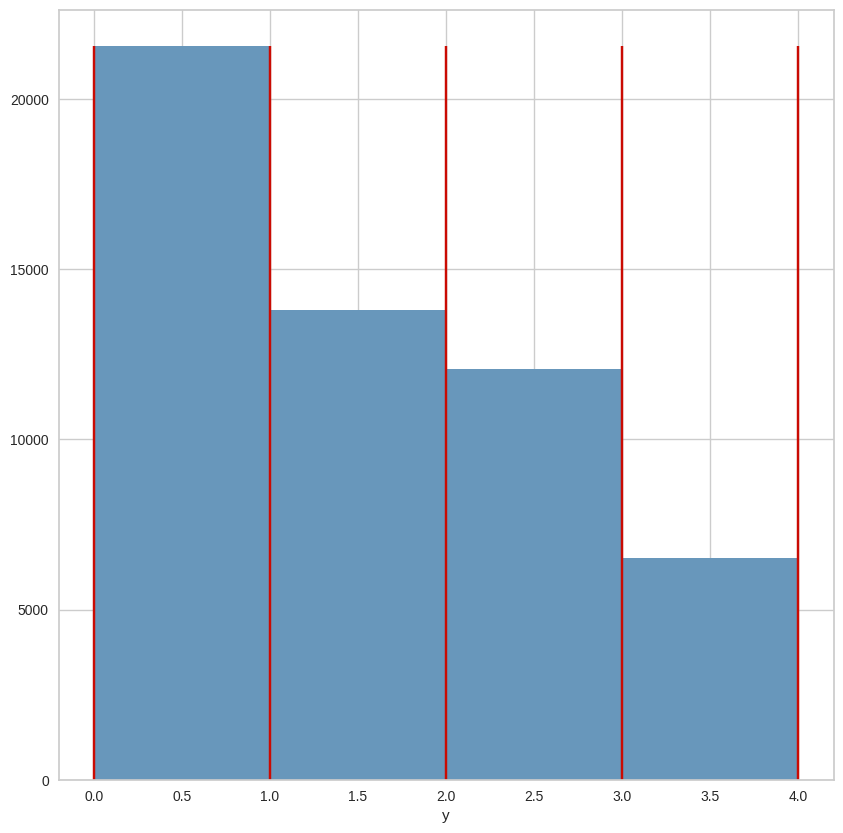

BalancedBinningReference(ax=<Axes: xlabel='y'>, target='y')

In [45]:
plt.figure(figsize=(10, 10))
balanced_binning_reference(y1)

ClassBalance(ax=<Axes: >)

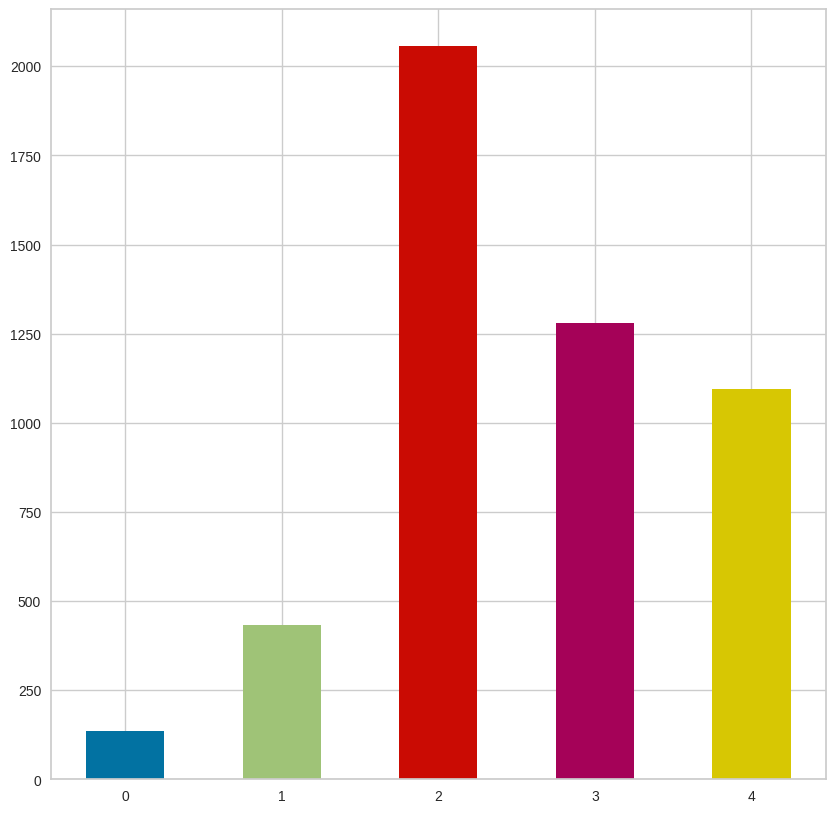

In [48]:
visualizer = ClassBalance()
plt.figure(figsize=(10, 10))
visualizer.fit(y)

In [47]:
from yellowbrick.target import ClassBalance